In [3]:
import pandas as pd
from pathlib import Path
import lightgbm as lgb

In [4]:
DATA_PATH = Path("../dataset")
COMP_DATA_PATH = Path("../data")
IMAGE_PATH = Path("../dataset")

VERSION = "v2_sift"

TEST_SET = DATA_PATH / f"test_df_with_features_{VERSION}.csv"
TRAIN_SPLIT = DATA_PATH / f"train_df_with_features_{VERSION}.csv"
VAL_SPLIT = DATA_PATH / f"val_df_with_features_{VERSION}.csv"

In [5]:
train_features = pd.read_csv(TRAIN_SPLIT)
test_features = pd.read_csv(TEST_SET)
val_features = pd.read_csv(VAL_SPLIT)
train_features

/tmp/ipykernel_1551127/4251646555.py:1: DtypeWarning:

Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.



,image_url1,image_url2,is_same,image_path1,image_path2,ahash_16,ahash_8,ahash_4,phash_16_8,phash_8,...,right_grayscale,left_height,right_height,left_width,right_width,width_diff,height_diff,width_ratio,height_ratio,sift_similarity
0,892325437.jpg,944751814.jpg,0,dataset/images_train_unpadded/892325437.jpg,dataset/images_train_unpadded/944751814.jpg,120.0,23.0,8.0,106.0,22.0,...,False,597.0,600.0,800.0,800.0,0.0,3.0,1.0000,0.995000,0.017561
1,965225293.jpg,965564035.jpg,1,dataset/images_train_unpadded/965225293.jpg,dataset/images_train_unpadded/965564035.jpg,0.0,0.0,0.0,0.0,0.0,...,False,800.0,800.0,600.0,600.0,0.0,0.0,1.0000,1.000000,1.000000
2,892403612.jpg,927225968.jpg,0,dataset/images_train_unpadded/892403612.jpg,dataset/images_train_unpadded/927225968.jpg,115.0,31.0,7.0,126.0,22.0,...,False,600.0,600.0,800.0,800.0,0.0,0.0,1.0000,1.000000,0.013801
3,917878082.jpg,921610429.jpg,1,dataset/images_train_unpadded/917878082.jpg,dataset/images_train_unpadded/921610429.jpg,10.0,6.0,0.0,22.0,6.0,...,False,600.0,600.0,800.0,800.0,0.0,0.0,1.0000,1.000000,0.508948
4,907769150.jpg,921819974.jpg,0,dataset/images_train_unpadded/907769150.jpg,dataset/images_train_unpadded/921819974.jpg,73.0,16.0,5.0,100.0,16.0,...,False,800.0,600.0,600.0,800.0,200.0,200.0,0.7500,1.333333,0.010151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72482,896077337.jpg,932363571.jpg,0,dataset/images_train_unpadded/896077337.jpg,dataset/images_train_unpadded/932363571.jpg,140.0,37.0,9.0,104.0,26.0,...,False,600.0,600.0,800.0,800.0,0.0,0.0,1.0000,1.000000,0.014190
72483,919255125.jpg,922397616.jpg,0,dataset/images_train_unpadded/919255125.jpg,dataset/images_train_unpadded/922397616.jpg,96.0,22.0,4.0,108.0,20.0,...,False,600.0,563.0,800.0,1000.0,200.0,37.0,0.8000,1.065719,0.013191
72484,924310310.jpg,925806417.jpg,1,dataset/images_train_unpadded/924310310.jpg,dataset/images_train_unpadded/925806417.jpg,4.0,0.0,0.0,0.0,0.0,...,False,600.0,600.0,800.0,800.0,0.0,0.0,1.0000,1.000000,0.555821
72485,927655303.jpg,931435054.jpg,1,dataset/images_train_unpadded/927655303.jpg,dataset/images_train_unpadded/931435054.jpg,2.0,0.0,0.0,8.0,0.0,...,False,800.0,800.0,600.0,600.0,0.0,0.0,1.0000,1.000000,0.288120


In [6]:
train_features_cleaned = train_features.drop(["image_url1", "image_url2", "image_path1", "image_path2"], axis=1)
test_features_cleaned = test_features.drop(["image_url1", "image_url2", "image_path1", "image_path2"], axis=1)
val_features_cleaned = val_features.drop(["image_url1", "image_url2", "image_path1", "image_path2"], axis=1)
train_features_cleaned

,is_same,ahash_16,ahash_8,ahash_4,phash_16_8,phash_8,phash_4,dhash_verical_16,dhash_16,dhash_8,...,right_grayscale,left_height,right_height,left_width,right_width,width_diff,height_diff,width_ratio,height_ratio,sift_similarity
0,0,120.0,23.0,8.0,106.0,22.0,6.0,135.0,136.0,30.0,...,False,597.0,600.0,800.0,800.0,0.0,3.0,1.0000,0.995000,0.017561
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,800.0,800.0,600.0,600.0,0.0,0.0,1.0000,1.000000,1.000000
2,0,115.0,31.0,7.0,126.0,22.0,6.0,119.0,95.0,19.0,...,False,600.0,600.0,800.0,800.0,0.0,0.0,1.0000,1.000000,0.013801
3,1,10.0,6.0,0.0,22.0,6.0,2.0,21.0,27.0,1.0,...,False,600.0,600.0,800.0,800.0,0.0,0.0,1.0000,1.000000,0.508948
4,0,73.0,16.0,5.0,100.0,16.0,6.0,107.0,115.0,27.0,...,False,800.0,600.0,600.0,800.0,200.0,200.0,0.7500,1.333333,0.010151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72482,0,140.0,37.0,9.0,104.0,26.0,6.0,117.0,104.0,24.0,...,False,600.0,600.0,800.0,800.0,0.0,0.0,1.0000,1.000000,0.014190
72483,0,96.0,22.0,4.0,108.0,20.0,6.0,119.0,104.0,36.0,...,False,600.0,563.0,800.0,1000.0,200.0,37.0,0.8000,1.065719,0.013191
72484,1,4.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,...,False,600.0,600.0,800.0,800.0,0.0,0.0,1.0000,1.000000,0.555821
72485,1,2.0,0.0,0.0,8.0,0.0,0.0,4.0,11.0,1.0,...,False,800.0,800.0,600.0,600.0,0.0,0.0,1.0000,1.000000,0.288120


In [7]:
from sklearn.metrics import f1_score
import numpy as np

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat, average="macro"), True

In [17]:
train_features.columns

Index(['image_url1', 'image_url2', 'is_same', 'image_path1', 'image_path2',
       'ahash_16', 'ahash_8', 'ahash_4', 'phash_16_8', 'phash_8', 'phash_4',
       'dhash_verical_16', 'dhash_16', 'dhash_8', 'dhash_4', 'colorhash_21',
       'colorhash_63', 'whash_16_haar', 'whash_8_haar', 'whash_4_haar',
       'whash_16_db4', 'left_grayscale', 'right_grayscale', 'left_height',
       'right_height', 'left_width', 'right_width', 'width_diff',
       'height_diff', 'width_ratio', 'height_ratio', 'sift_similarity'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning:

Found `num_round` in params. Will use it instead of argument

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:260: UserWarning:

'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.



[LightGBM] [Info] Number of positive: 23113, number of negative: 49374
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.071921 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3156
[LightGBM] [Info] Number of data points in the train set: 72487, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.318857 -> initscore=-0.759029
[LightGBM] [Info] Start training from score -0.759029
[1]	train's binary_logloss: 0.531534	train's f1: 0.405167	val's binary_logloss: 0.532007	val's f1: 0.404866
[2]	train's binary_logloss: 0.458421	train's f1: 0.405167	val's binary_logloss: 0.458853	val's f1: 0.404866
[3]	train's binary_logloss: 0.399317	train's f1: 0.994964	val's binary_logloss: 0.399658	val's f1: 0.994661
[4]	train's binary_logloss: 0.350278	train's f1: 0.998124	val's binary_logloss: 0.350557	val's f1: 0.998289
[5]	train's binary_logloss: 0.308864	train's f1: 0.998682	val's binary_

<AxesSubplot: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='f1'>

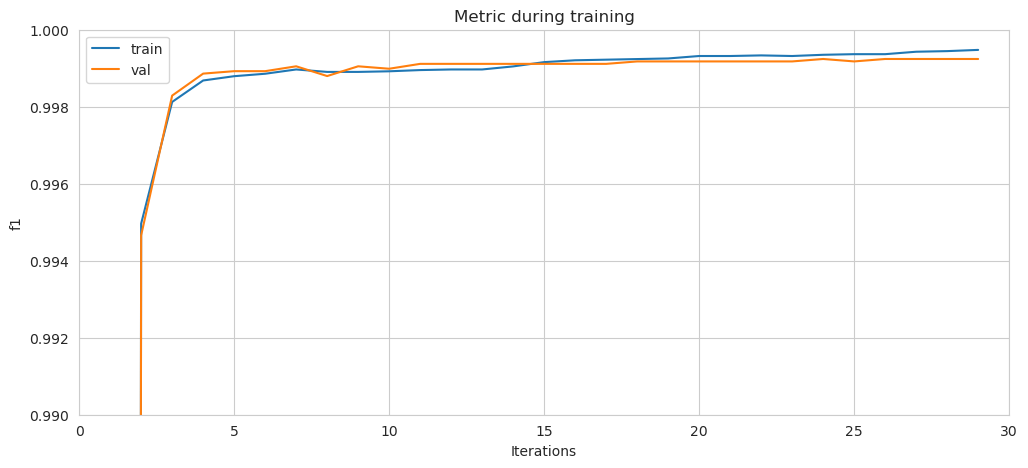

In [21]:
param = {
    # "max_depth": 5,
    "num_round": 30,
    'metric': [],
    'objective': 'binary'
}

# FEATURES_TO_DROP = ["left_width", "left_height", "right_width", "right_height",]
FEATURES_TO_DROP = ["left_grayscale", "right_grayscale", "phash_16_8", "ahash_16", 'dhash_verical_16', 'dhash_16']


train_lgbm = lgb.Dataset(train_features_cleaned.drop(["is_same", *FEATURES_TO_DROP], axis=1), 
                         label=train_features_cleaned["is_same"])

val_lgbm = lgb.Dataset(val_features_cleaned.drop(["is_same", *FEATURES_TO_DROP], axis=1), 
                         label=val_features_cleaned["is_same"])

evals_result = {}

clf = lgb.train(param, train_lgbm, valid_sets=[val_lgbm, train_lgbm], valid_names=['val', 'train'], feval=lgb_f1_score, evals_result=evals_result)

lgb.plot_metric(evals_result, metric='f1', ylim=(0.99, 1))

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

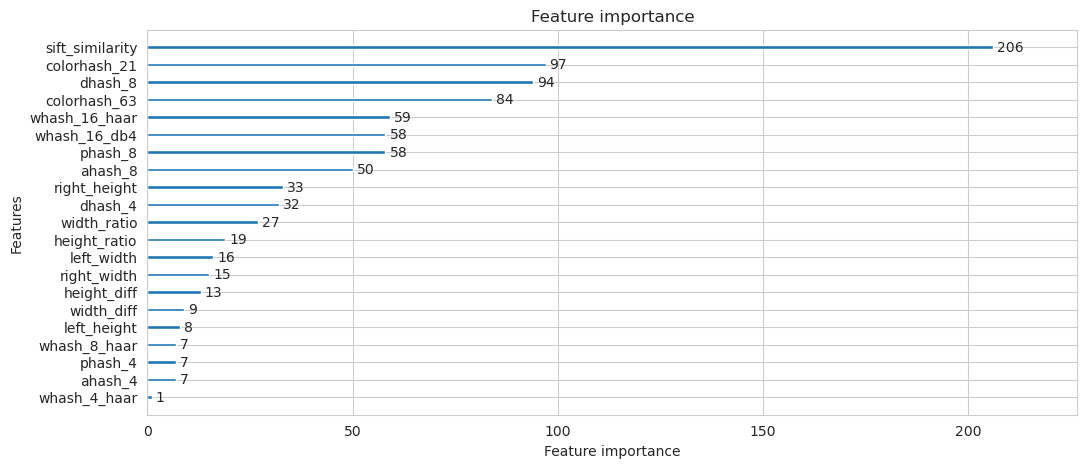

In [22]:
lgb.plot_importance(clf)

In [10]:
import json
with open('../models/basic_lgbm_v2_sift.json', 'w', encoding='utf-8') as f:
    json.dump(clf.dump_model(), f, ensure_ascii=False, indent=4)

In [25]:
predict = clf.predict(val_features_cleaned.drop(columns=["is_same", *FEATURES_TO_DROP]))

for threshold in np.arange(0.1, 0.9, 0.1):
    print(f"Threshold: {threshold}")
    print(f"F1: {f1_score(val_features_cleaned['is_same'], predict > threshold, average='macro')}")

Threshold: 0.1
F1: 0.9984180426534746
Threshold: 0.2
F1: 0.9991135788609031
Threshold: 0.30000000000000004
F1: 0.9993034308649089
Threshold: 0.4
F1: 0.999240002267725
Threshold: 0.5
F1: 0.999240002267725
Threshold: 0.6
F1: 0.9991765562328361
Threshold: 0.7000000000000001
F1: 0.9989863917041262
Threshold: 0.8
F1: 0.9989229919168461


In [26]:
val_features["predict"] = predict
val_features.to_csv("boosting_v2.1_sift_val_pred.csv")

In [27]:
from sklearn.metrics import classification_report, roc_auc_score

predict = clf.predict(val_features_cleaned.drop(columns=["is_same", *FEATURES_TO_DROP]))

print("THRESHOLD 0.3")
print(classification_report(val_features_cleaned['is_same'], predict > 0.3, digits=5))

print("THRESHOLD 0.5")
print(classification_report(val_features_cleaned['is_same'], predict > 0.5, digits=5))

print(f"{roc_auc_score(val_features_cleaned['is_same'], predict)=}")


THRESHOLD 0.3
              precision    recall  f1-score   support

           0    0.99960   0.99951   0.99955     12348
           1    0.99897   0.99914   0.99905      5803

    accuracy                        0.99939     18151
   macro avg    0.99928   0.99933   0.99930     18151
weighted avg    0.99939   0.99939   0.99939     18151

THRESHOLD 0.5
              precision    recall  f1-score   support

           0    0.99943   0.99960   0.99951     12348
           1    0.99914   0.99879   0.99897      5803

    accuracy                        0.99934     18151
   macro avg    0.99929   0.99919   0.99924     18151
weighted avg    0.99934   0.99934   0.99934     18151

roc_auc_score(val_features_cleaned['is_same'], predict)=0.9997331396062525


In [32]:
is_same = pd.Series(clf.predict(test_features_cleaned.drop(["ID", *FEATURES_TO_DROP], axis=1)))
submission = pd.DataFrame({
    "ID": test_features_cleaned["ID"],
    "is_same": is_same
})

In [33]:
TH = 0.3
submission["is_same"] = (submission["is_same"] > TH).astype(int)
submission["same"] = (submission["is_same"] == 1).astype(int)
submission["different"] = (submission["is_same"] == 0).astype(int)
submission.drop(columns=["is_same"], inplace=True)

In [34]:
submission.isnull().sum()

ID           0
same         0
different    0
dtype: int64

In [35]:
submission.to_csv("boosting_baseline_v2.1_sift.csv", index=False)